<a href="https://colab.research.google.com/github/Ksenyakin/MO/blob/main/ind1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка датасета и ознакомление с его структурой.
2. Удаление ненужных столбцов, таких как URL статьи или дата публикации, которые не влияют на популярность.


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('OnlineNewsPopularity.csv')

print(data.head())
print(data.info())

data.columns = data.columns.str.strip()#Удаляем лишние пробелы
data = data.drop(columns=['url', 'timedelta'])


data = data.fillna(data.mean())



                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

4. Преобразование категориальных переменных в числовые с помощью метода One-Hot Encoding или Label Encoding.

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(data.head())
print(data.info())


   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity

5. Масштабирование числовых признаков для более точной работы модели.

In [8]:
from sklearn.preprocessing import StandardScaler

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('shares')

scaler = StandardScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())


   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.856279         -0.689403         0.025739         -0.002929   
1       -0.596955         -0.613418         0.010619         -0.002929   
2       -0.596955         -0.706289         0.003011         -0.002929   
3       -0.596955         -0.030865        -0.015317         -0.002929   
4        1.340691          1.111024        -0.037962         -0.002929   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.030627  -0.630780       -0.363812 -0.432435   -0.301289   
1                  0.024132  -0.719761       -0.618245 -0.432435   -0.301289   
2                 -0.011359  -0.719761       -0.618245 -0.432435   -0.301289   
3                 -0.010869  -0.185878       -0.872678 -0.432435   -0.301289   
4                 -0.045435   0.703928        3.961551  1.766589   -0.301289   

   average_token_length  ...  min_positive_polarity  max_positive_polarity

6. Построение гистограммы распределения популярности статей для понимания их разброса.

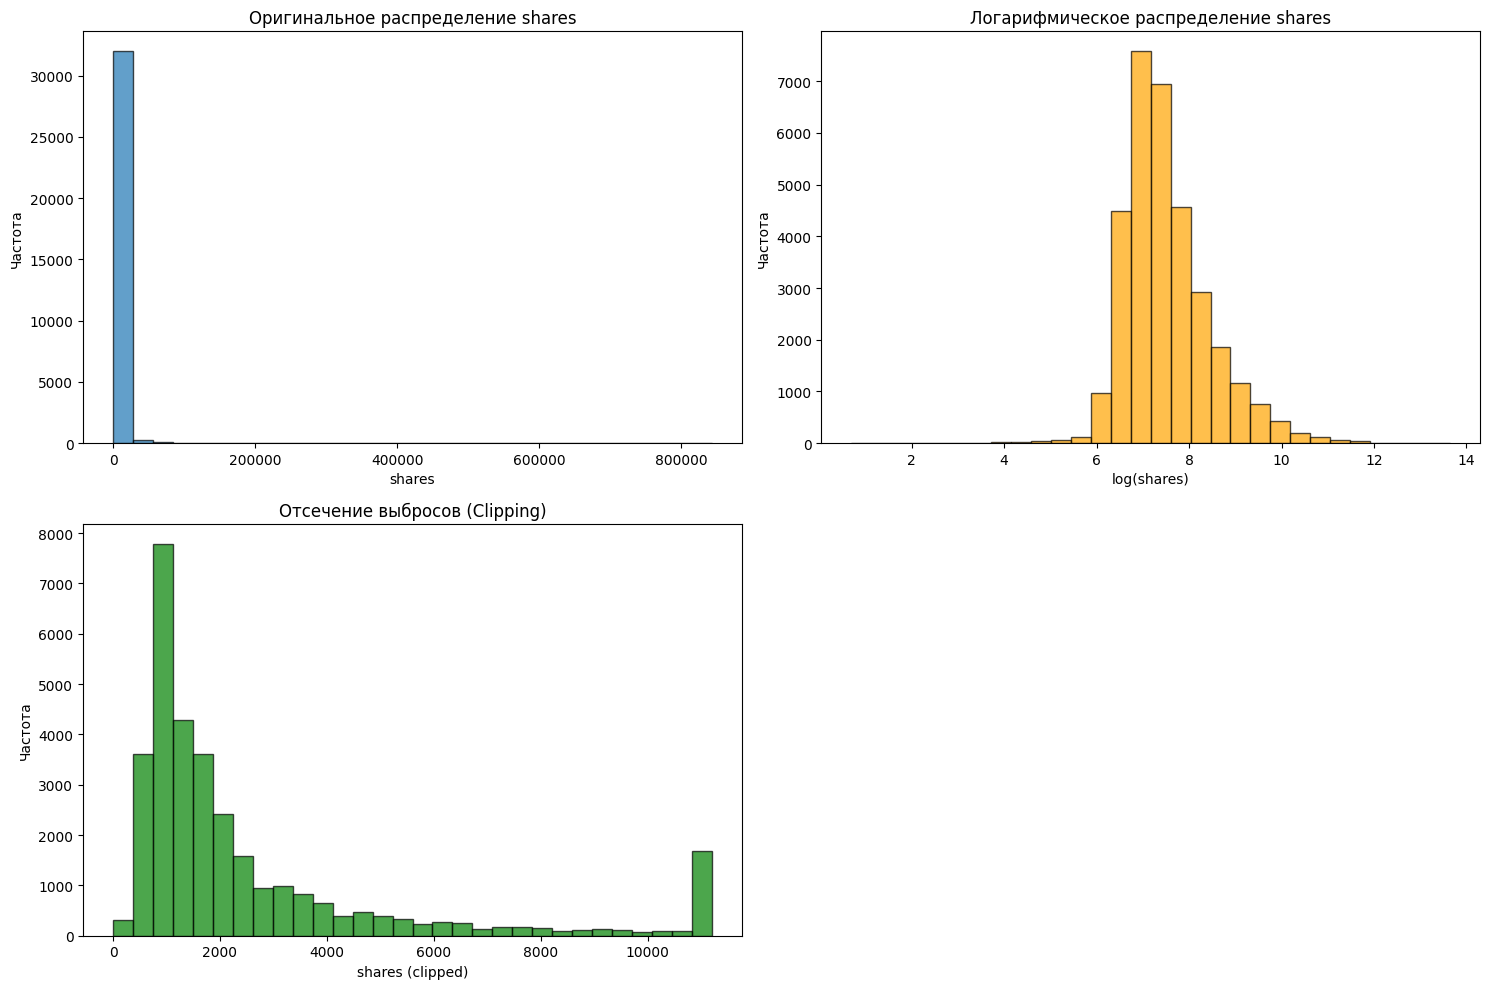

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(data['shares'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Оригинальное распределение shares')
plt.xlabel('shares')
plt.ylabel('Частота')

shares_log = np.log1p(data['shares'])
plt.subplot(2, 2, 2)
plt.hist(shares_log, bins=30, edgecolor='k', alpha=0.7, color='orange')
plt.title('Логарифмическое распределение shares')
plt.xlabel('log(shares)')
plt.ylabel('Частота')

threshold = data['shares'].quantile(0.95)
shares_clipped = np.where(data['shares'] > threshold, threshold, data['shares'])
plt.subplot(2, 2, 3)
plt.hist(shares_clipped, bins=30, edgecolor='k', alpha=0.7, color='green')
plt.title('Отсечение выбросов (Clipping)')
plt.xlabel('shares (clipped)')
plt.ylabel('Частота')



plt.tight_layout()
plt.show()


7. Визуализация корреляции между признаками с помощью матрицы корреляции или тепловой карты.

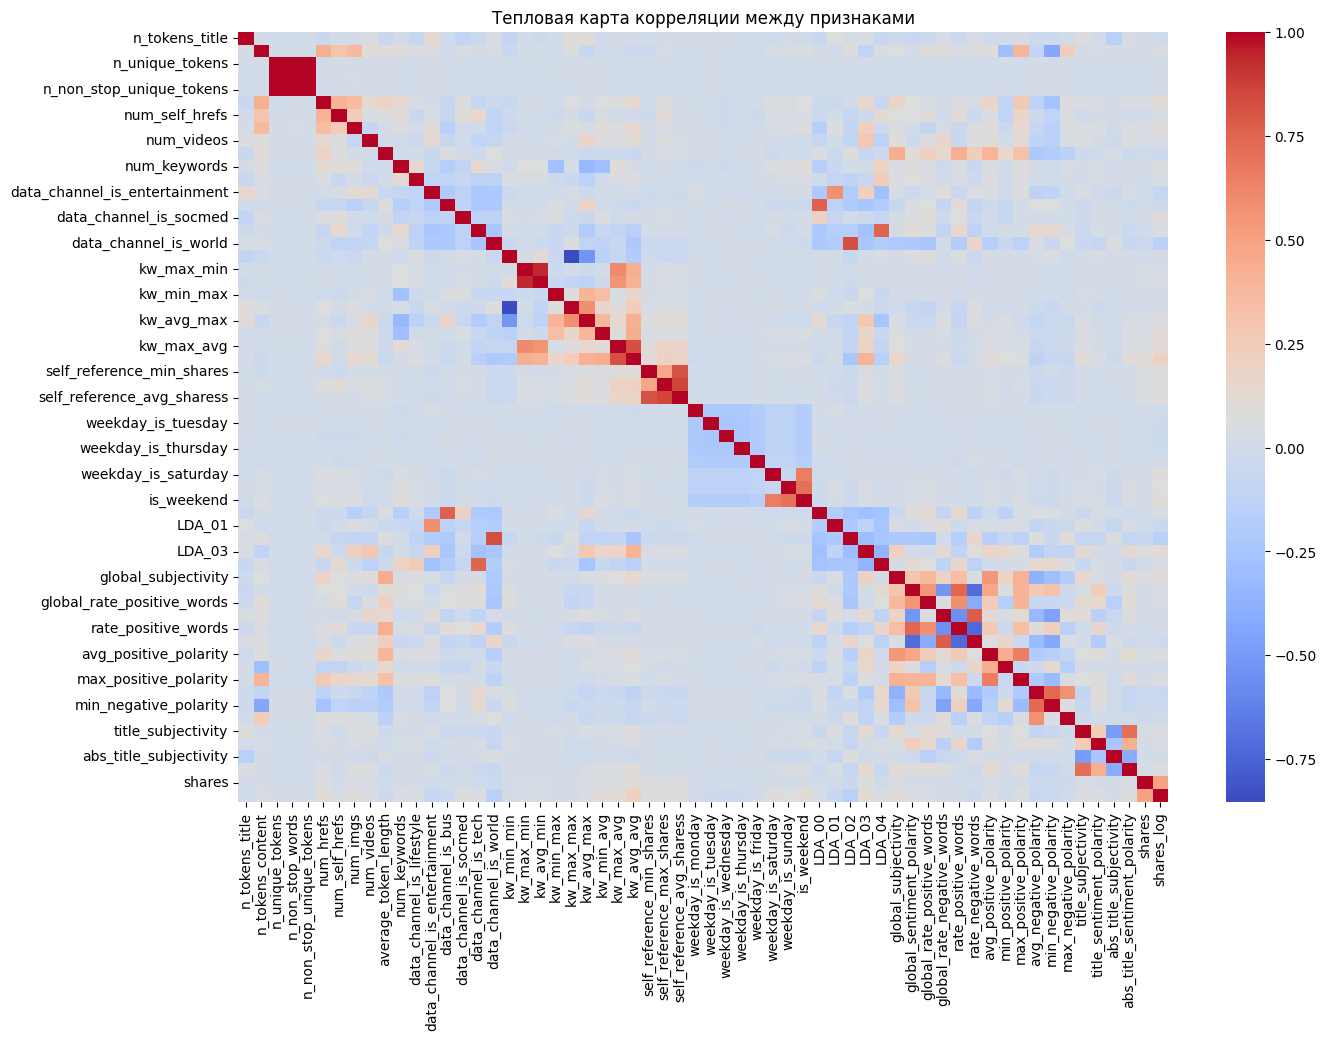

<ipython-input-14-4478315cbead>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shares_corr.values, y=shares_corr.index, palette='coolwarm')


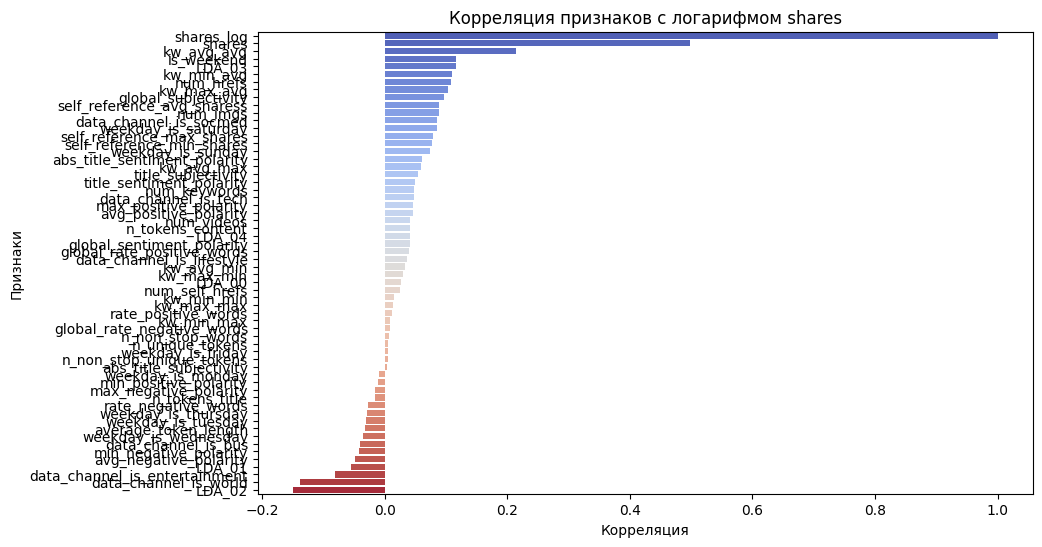

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data['shares_log'] = np.log1p(data['shares'])

correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Тепловая карта корреляции между признаками')
plt.show()

plt.figure(figsize=(10, 6))
shares_corr = correlation_matrix['shares_log'].sort_values(ascending=False)
sns.barplot(x=shares_corr.values, y=shares_corr.index, palette='coolwarm')
plt.title('Корреляция признаков с логарифмом shares')
plt.xlabel('Корреляция')
plt.ylabel('Признаки')
plt.show()



8. Построение scatter plot для отображения зависимости популярности статей от выбранных признаков.

Топ-6 признаков, наиболее коррелирующих с shares_log:
Index(['shares', 'kw_avg_avg', 'is_weekend', 'LDA_03', 'kw_min_avg',
       'num_hrefs'],
      dtype='object')


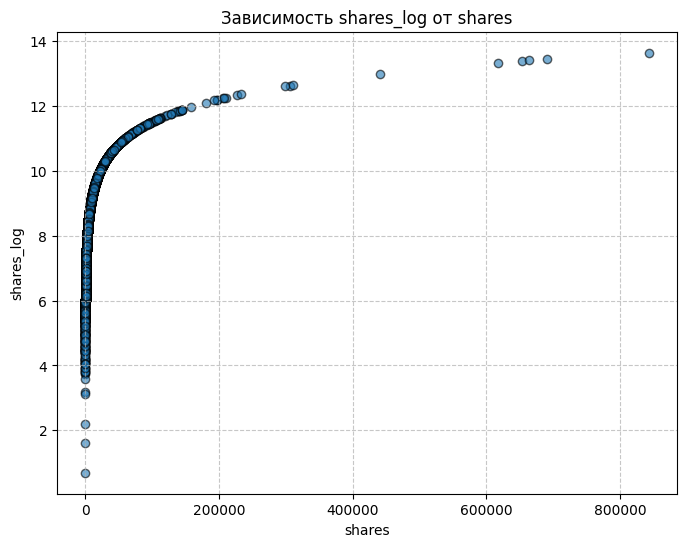

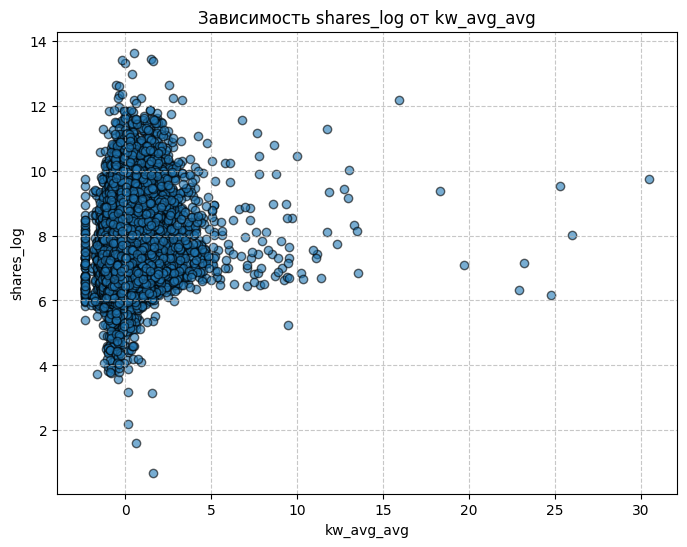

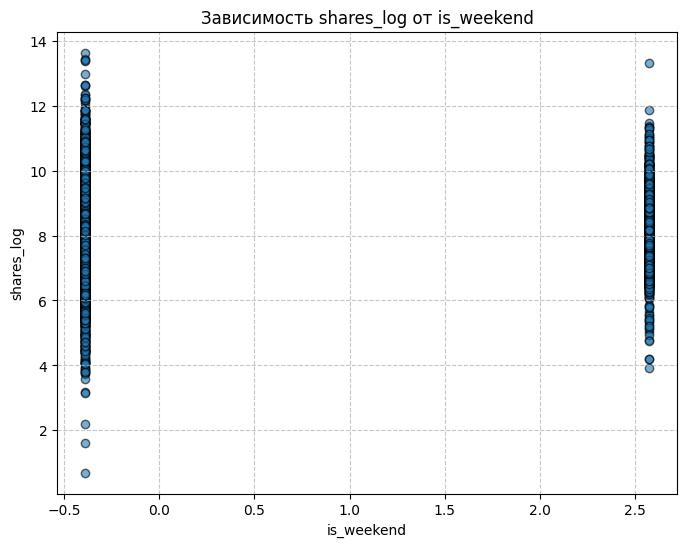

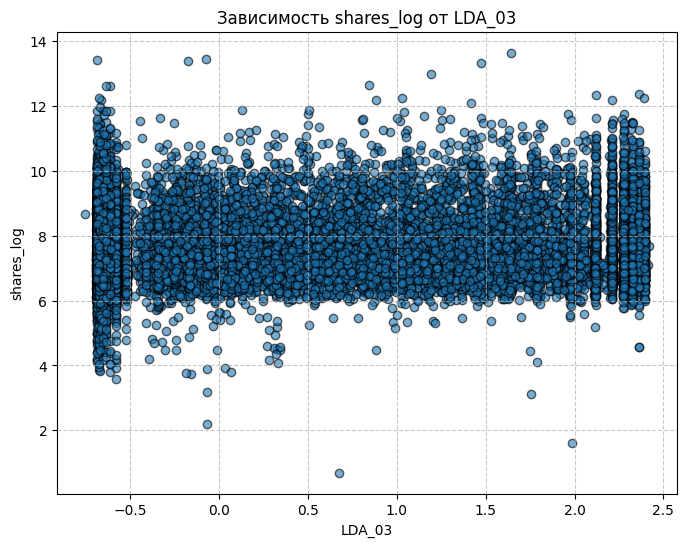

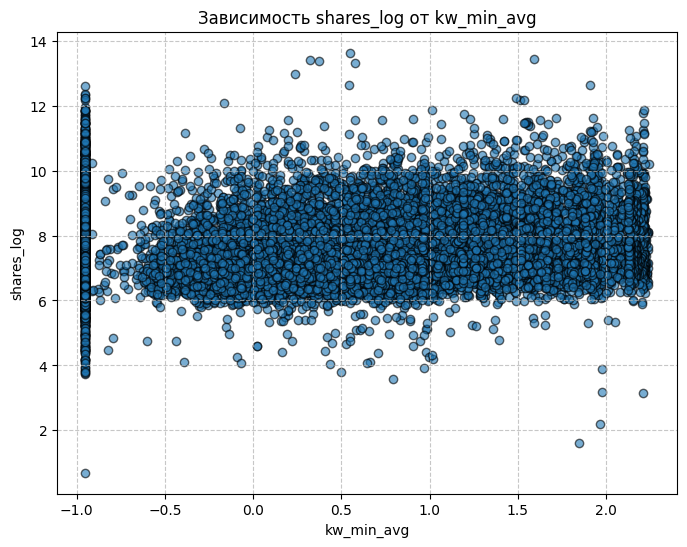

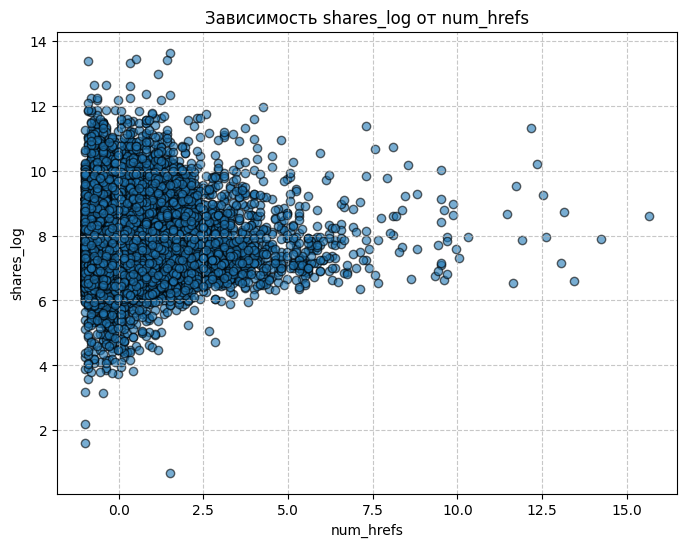

In [16]:

correlation_with_target = data.corr()['shares_log'].sort_values(ascending=False)

top_6_features = correlation_with_target.index[1:7]
print("Топ-6 признаков, наиболее коррелирующих с shares_log:")
print(top_6_features)

import matplotlib.pyplot as plt

for feature in top_6_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['shares_log'], alpha=0.6, edgecolor='k')
    plt.title(f'Зависимость shares_log от {feature}')
    plt.xlabel(feature)
    plt.ylabel('shares_log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


9. Разделение данных на тренировочный и тестовый наборы.

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['shares_log', 'shares'])
y = data['shares_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер тренировочного набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)


Размер тренировочного набора: (22690, 58)
Размер тестового набора: (9725, 58)


10. Выбор и обучение модели регрессии, такой как линейная регрессия, случайный лес или градиентный бустинг.
11. Оценка точности модели с помощью метрик, таких как R2-коэффициент или среднеквадратическая ошибка.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse
    }

for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Model: Linear Regression
  R2 Score: -26775023453276128.0000
  Mean Squared Error: 22845954451959860.0000

Model: Random Forest
  R2 Score: 0.1543
  Mean Squared Error: 0.7216

Model: Gradient Boosting
  R2 Score: 0.1629
  Mean Squared Error: 0.7143



12. Оценка важности признаков с помощью feature importance для отбора наиболее значимых переменных.

Топ-10 наиболее значимых признаков:
                       Feature  Importance
25                  kw_avg_avg    0.093092
24                  kw_max_avg    0.039506
22                  kw_avg_max    0.034180
26   self_reference_min_shares    0.033905
28  self_reference_avg_sharess    0.032287
38                      LDA_01    0.031174
9         average_token_length    0.030808
41                      LDA_04    0.030613
42         global_subjectivity    0.029923
37                      LDA_00    0.029261


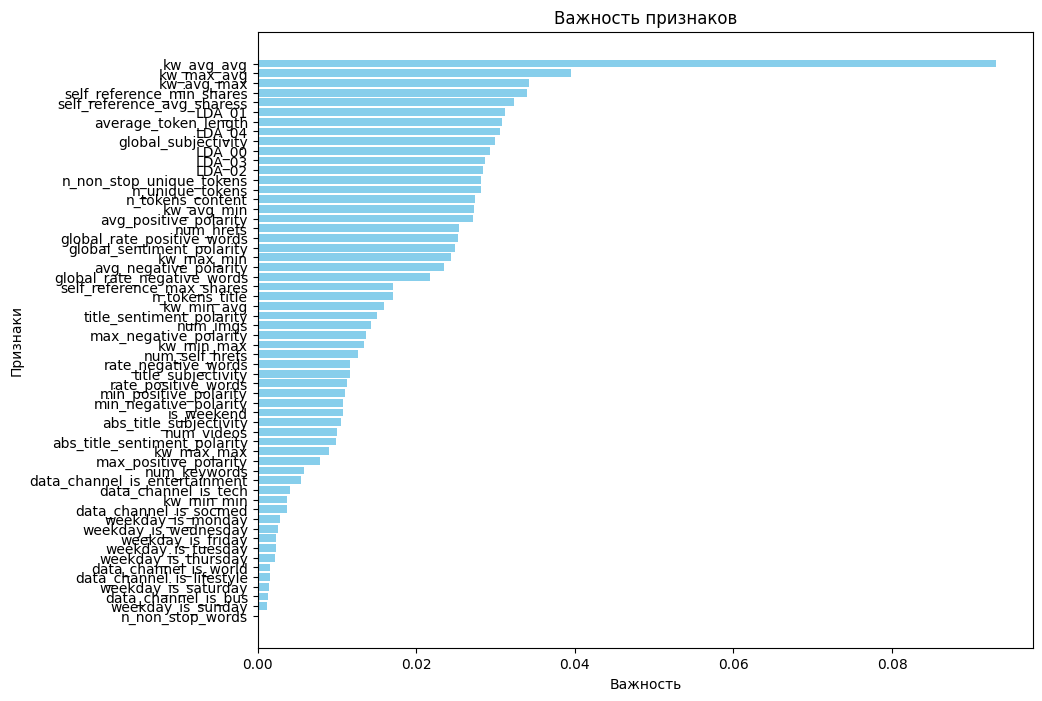

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Топ-10 наиболее значимых признаков:")
print(importance_df.head(10))

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()


13. Переобучение модели с использованием отобранных признаков.
14. Повторная оценка точности модели и сравнение с предыдущей моделью.


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

selected_features = importance_df['Feature'].head(20).values
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():

    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse
    }

for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Model: Linear Regression
  R2 Score: -16585453807319316.0000
  Mean Squared Error: 14151641095975912.0000

Model: Random Forest
  R2 Score: 0.1257
  Mean Squared Error: 0.7460

Model: Gradient Boosting
  R2 Score: 0.1290
  Mean Squared Error: 0.7432

